# Analiza zdravstvenih podataka po državama i dobnim skupinama
### Laura Štefanac

## Uvod
Podaci o bolestima imaju ključnu ulogu u unapređenju zdravstvenog sustava. Današnja digitalizacija ima veliku ulogu u analizi zdravstvenih podataka prema različitim demografskim i geografskim kategorijama gdje nam omogućava dublje razumijevanje zašto se neka bolest širi, kakav utjecaj to ima na socioekonomski status populacije i slično. Zdravstveni sustav se svakodnevno suočava s novim izazovima, a razumijevanje dinamike širenja bolesti i njezinih faktora ključno je za razvoj učinkovitih prevencija bolesti i liječenja istih. U ovom projektu ću analizirati koje su bolesti najzastupljenije u kojim državama i u kojim dobnim skupinama prevladavaju određene bolesti. Također provesti ću analizu na skupu podataka koliko je žena i muškaraca, koliko je osoba određene krvne grupe, koliko je žena i muškaraca u određenoj državi, te broj osoba s određenom bolešću po spolu. Skup podataka je generiran na web stranici https://generatedata.com/. Generirana su dva skupa podataka jedan pod imenom person_data.csv koji sadrži podatke o pojedincu, ime i prezime, spol, godine, adresu, državu, visinu i težinu. Drugi skup podataka pod imenom medical_info.json sadrži podatke o bolestima, ime bolesti, posjet doktoru, ime doktora, ime kompanije zdravstvenog osiguranja, je li osoba hospitalizirana i krvnu grupu. Ideju sam pronašla na https://www.kaggle.com/code/hainescity/healthcare-dataset-eda. Imena osiguravajućih kuća za zdravstveno osiguranje i imena bolesti sam izgenerirala pomoću ChatGPT-a, ostali podaci su izgenerirani pomoću https://generatedata.com/

In [1]:
# Učitavnje podataka i prikazivanje strukture .csv i .json datoteke
import pandas as pd 

csv_info_path = r"C:\Laura\Faks\3. godina\PzAP\projekt\person_data.csv"
csv_info = pd.read_csv(csv_info_path)

json_info_path = r"C:\Laura\Faks\3. godina\PzAP\projekt\medical_info.json"
json_info = pd.read_json(json_info_path)

print("CSV datoteka:")
print(csv_info.head())

print("JSON datoteka:")
print(json_info.head())

CSV datoteka:
               name  gender  numberrange                      address  \
0       Kyra Hayden    Male           28                8270 Amet Rd.   
1  Jolene Carpenter    Male           29             389-190 Ante Rd.   
2        Vera Sloan  Female           30  P.O. Box 679, 7300 Leo. St.   
3     Nigel Workman    Male           19     Ap #387-6612 Quisque Ave   
4     Wesley Chavez  Female           71    Ap #252-1857 Molestie Rd.   

       country  height_cm  weight_kg  
0       Canada        175         64  
1         Peru        158        106  
2  Netherlands        156         89  
3       Mexico        170         93  
4       Norway        150        114  
JSON datoteka:
           name       date          doctor          insurance boolean  \
0       Obesity 2017-11-25  Mannix Dillard              Cigna      No   
1    Hepatitis  2019-08-03  Quynn Whitaker             Anthem     Yes   
2  Fibromyalgia 2016-08-30   Macon Shelton  Molina Healthcare     Yes   
3   Sl

In [2]:
# Provjera ima li nedostajućih podataka unutar datasetova
missing_csv_info = csv_info.isnull().sum()
print("Nedostajuće vrijednosti u .csv dokumentu:")
print(missing_csv_info)

missing_json_info = json_info.isnull().sum()
print("Nedostajuće vrijednosti u .json dokumentu:")
print(missing_json_info)

Nedostajuće vrijednosti u .csv dokumentu:
name           0
gender         0
numberrange    0
address        0
country        0
height_cm      0
weight_kg      0
dtype: int64
Nedostajuće vrijednosti u .json dokumentu:
name          0
date          0
doctor        0
insurance     0
boolean       0
blood_type    0
dtype: int64


In [3]:
# Provjera tipova podataka u datasetovima
csv_datatype = csv_info.dtypes
json_datatype = json_info.dtypes

print("CSV tipovi podataka:")
print(csv_datatype)

print("JSON tipovi podataka:")
print(json_datatype)

CSV tipovi podataka:
name           object
gender         object
numberrange     int64
address        object
country        object
height_cm       int64
weight_kg       int64
dtype: object
JSON tipovi podataka:
name                  object
date          datetime64[ns]
doctor                object
insurance             object
boolean               object
blood_type            object
dtype: object


Prilikom kreiranja skupa podataka svi stupci nisu imenovani dobro, stoga ih je potrebno preimenovati. Stupci koje je potrebno preimenovati su: _hospitalized_, _disease_ iz. json datoteke te _age_ iz .csv datoteke.

In [4]:
# U pitanju su dva stupca iz .json dataseta (boolean i name), te jedan stupac iz .csv datoteke (numberrange)
json_info = json_info.rename(columns={'boolean': 'hospitalized'})
json_info = json_info.rename(columns={'name': 'disease'})

csv_info = csv_info.rename(columns={'numberrange': 'age'})

print(json_info.head())
print(csv_info.head())

        disease       date          doctor          insurance hospitalized  \
0       Obesity 2017-11-25  Mannix Dillard              Cigna           No   
1    Hepatitis  2019-08-03  Quynn Whitaker             Anthem          Yes   
2  Fibromyalgia 2016-08-30   Macon Shelton  Molina Healthcare          Yes   
3   Sleep Apnea 2022-05-21  Harding Hinton  United Healthcare          Yes   
4   Sleep Apnea 2019-03-24        Olga Fox             Anthem          Yes   

  blood_type  
0         0+  
1         A+  
2        AB+  
3        AB+  
4         B+  
               name  gender  age                      address      country  \
0       Kyra Hayden    Male   28                8270 Amet Rd.       Canada   
1  Jolene Carpenter    Male   29             389-190 Ante Rd.         Peru   
2        Vera Sloan  Female   30  P.O. Box 679, 7300 Leo. St.  Netherlands   
3     Nigel Workman    Male   19     Ap #387-6612 Quisque Ave       Mexico   
4     Wesley Chavez  Female   71    Ap #252-1857 Mo

Dodavanje ID stupca kako bi se dva skupa podataka mogla spojiti.

In [5]:
# Datasetovi nisu imali ID te sam dodala stupac id u svaki dataset na početak DataFrame-a
csv_info.insert(0, 'id', range(1, len(csv_info) + 1))
json_info.insert(0, 'id', range(1, len(json_info) + 1))

print("CSV datoteka:")
print(csv_info.head())

print("JSON datoteka:")
print(json_info.head())

CSV datoteka:
   id              name  gender  age                      address  \
0   1       Kyra Hayden    Male   28                8270 Amet Rd.   
1   2  Jolene Carpenter    Male   29             389-190 Ante Rd.   
2   3        Vera Sloan  Female   30  P.O. Box 679, 7300 Leo. St.   
3   4     Nigel Workman    Male   19     Ap #387-6612 Quisque Ave   
4   5     Wesley Chavez  Female   71    Ap #252-1857 Molestie Rd.   

       country  height_cm  weight_kg  
0       Canada        175         64  
1         Peru        158        106  
2  Netherlands        156         89  
3       Mexico        170         93  
4       Norway        150        114  
JSON datoteka:
   id       disease       date          doctor          insurance  \
0   1       Obesity 2017-11-25  Mannix Dillard              Cigna   
1   2    Hepatitis  2019-08-03  Quynn Whitaker             Anthem   
2   3  Fibromyalgia 2016-08-30   Macon Shelton  Molina Healthcare   
3   4   Sleep Apnea 2022-05-21  Harding Hinton

Spajanje skupova podataka u novi DataFrame pod imenom _combined_data_. Stupci koji su spojeni u novi DataFrame iz .csv datoteke su: _id_, _name_, _gender_, _age_ i _country_, te iz .json datoteke: _id_, _disease_, _date_, _insurance_ i _blood_type_. Pomoću funkcije _pd_merge_ skupovi se spajaju podatke u novi DataFrame. 

In [6]:
# Spajanje podataka u novi DataFrame
csv_selected = csv_info[['id', 'name', 'gender', 'age', 'country']]
json_selected = json_info[['id', 'disease', 'date', 'insurance', 'blood_type']]

combined_data = pd.merge(csv_selected, json_selected, on='id')

print(combined_data.head())

   id              name  gender  age      country       disease       date  \
0   1       Kyra Hayden    Male   28       Canada       Obesity 2017-11-25   
1   2  Jolene Carpenter    Male   29         Peru    Hepatitis  2019-08-03   
2   3        Vera Sloan  Female   30  Netherlands  Fibromyalgia 2016-08-30   
3   4     Nigel Workman    Male   19       Mexico   Sleep Apnea 2022-05-21   
4   5     Wesley Chavez  Female   71       Norway   Sleep Apnea 2019-03-24   

           insurance blood_type  
0              Cigna         0+  
1             Anthem         A+  
2  Molina Healthcare        AB+  
3  United Healthcare        AB+  
4             Anthem         B+  


In [7]:
# Povezivanje s bazom podataka, kreiranje tablice, pohranjivanje ranije stvorenog DataFrame-a u tablicu baze podataka (database_health)
import sqlite3

conn = sqlite3.connect('database_health.db')
combined_data.to_sql('database_health', conn, if_exists='replace', index=False)

conn.close()

Implementacija REST API-ja koristeći biblioteku Flask i Python web frameworka, te manipulacija podacima u bazi pomoću HTTP zahtjeva. Inicijalizira se Flask aplikacija s imenom _app_, funkcija _get_db_connection_ koristi se za povezivanje s bazom podataka, _sqlite3.Row_ služi kako bi se rezultati upita bili dostupni kao rječnici. _/data_ putanja omogućuje dohvat svih podataka iz baze podataka, sql upit dohvaća sve retke iz baze, zatim dobivene rezultate pretvara u rječnik kako bi se kasnije lakše pretvorilo u JSON format, _/data/<int:id>_ omogućuje dohvaćanje pojedinačnih podataka iz baze podataka.

In [8]:
# Implementacija REST API-ja koristeći biblioteku Flask i Python web framewoerk
from flask import Flask, jsonify, request

app = Flask(__name__)

def get_db_connection():
    conn = sqlite3.connect('database_health.db')
    conn.row_factory = sqlite3.Row
    return conn

@app.route('/data', methods=['GET'])
def get_data():
    conn = get_db_connection()
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM database_health')
    data = cursor.fetchall()
    conn.close()
    data_list = [dict(ix) for ix in data]
    return jsonify(data_list)

@app.route('/data/<int:id>', methods=['GET'])
def get_data_by_id(id):
    conn = get_db_connection()
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM database_health WHERE id = ?', (id,))
    data = cursor.fetchone()
    conn.close()
    return jsonify(dict(data)) if data else 'Data not found', 404

Pokretanje Flask web aplikacije pomoću biblioteeke threading

In [ ]:
# Koristim biblioteku threading za pokretanje Flask web aplikacije 
import threading

def run_app():
    app.run(port=5000, use_reloader=False)

flask_thread = threading.Thread(target=run_app)
flask_thread.start()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


Ispis statistike za godine, možemo zaključiti da raspolažem s 250 podataka, prosjek godina je 49, standardna devijacija iznosi 21.66.
Najmanja(min) vrijednost odnosno najmlađa osoba ima 11 godina, a najveća(max) odnosno najstarija osoba ima 89 godina. 25% osoba u skupu podataka ima manje od 30 godina, 50% osoba u skupu podataka je mlađa od 50.5 godina, te zadnjih 75% osoba u skupu podataka je mlađa od 67 godina

In [14]:
# Ispis statistike
statistics = combined_data['age'].describe()
print(statistics)

count    250.000000
mean      49.236000
std       21.658826
min       11.000000
25%       30.000000
50%       50.500000
75%       67.000000
max       89.000000
Name: age, dtype: float64


Grafički prikaz i analiza skupa podataka koliko je u kojoj zemlji zastupljena određena bolest
 - u Singaputu  najzastupljenija bolest fibromijalgija (kronična bolest koja karakterizira bol u mišićima/kostima/tijelu)
 - u Nizozemskoj i Peruu najzastupljenija bolest je artritis (kronična bolest kod koje dolazi do oticanja/upale zglobova)
 - u Brazilu najzastupljenija bolest je apneja u spavanju (poremećaj disanja tijekom spavanja)
 - u Ukrajini najzastupljenija bolest je ADHD (hiperaktivnost)
 - u Ujedinjenom Kraljevstvu najzastupljenija bolest je kronicna bolest bubrega (bubrezi otkazuju i tako gube svoju sposobnost za uklanjanje viška tekućine i otpadnih produkata metabolizma)

 Koristila sam biblioteke matplotlib i seaborn za generiranje grafova
 Prvo sam grupirala podatke po zemljama i bolestima (_disease_counts_) i pomoću funkcije _size()_ sam dobila broj pojedine bolesti i zemlje i na krjau koristim funkciju _resert_index()_ kako bih postavila indeks vrijednosti ponovno od 1 u novi DataFrame _counts_. Kreirala sam _custom_palette_ varijablu kako bih lakše razaznala bolesti u grafu [3]  pronašla sam ih na ovoj web stranici. Nakon toga slijedi kreiranje stupčastog dijagrama na x-osi vidimo da se nalaze brojevi (0-3), dok na y-osi se nalaze državae sa strane grafa nalazi se legenda koja prikazuje bolesti i boje koje odgovaraju istima u grafu. Legenda je pozicionirana izvan  grafa zbog toga jer se inače legenda preklapa s grafom ukoliko je unutar "okvira" grafa.

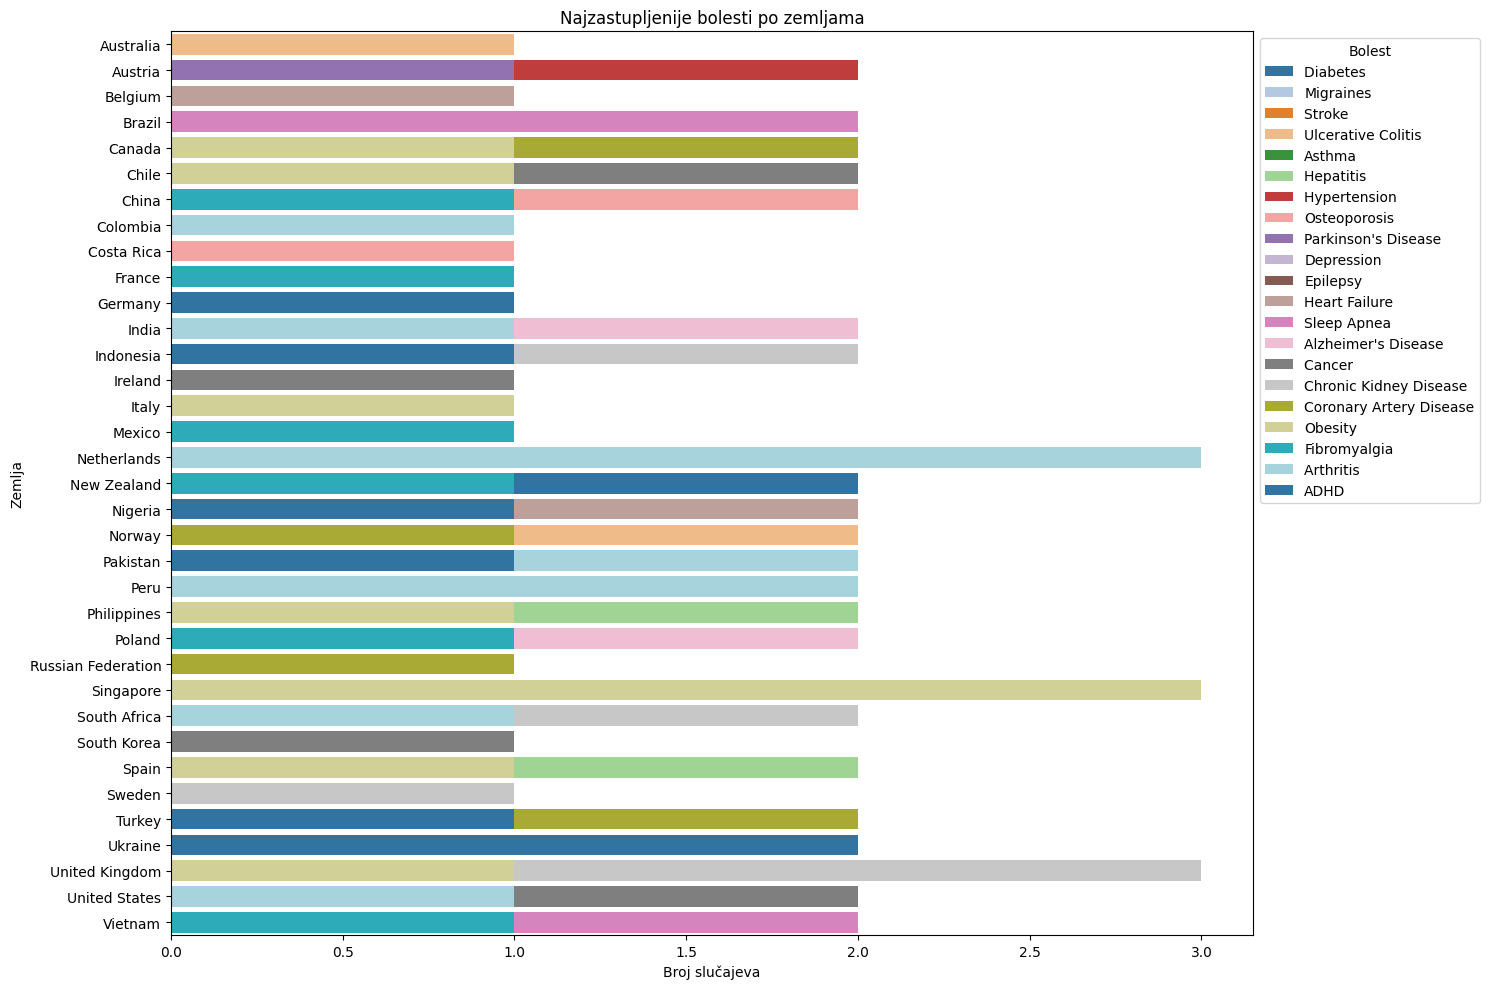

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

disease_counts = combined_data.groupby(['country', 'disease']).size().reset_index(name='counts')
custom_palette = sns.color_palette("tab20", n_colors=len(disease_counts['disease'].unique()))

plt.figure(figsize=(15, 10))  
sns.barplot(x='counts', y='country', data=disease_counts, hue='disease', palette=custom_palette, dodge=False)
plt.xlabel('Broj slučajeva')
plt.ylabel('Zemlja')
plt.title('Najzastupljenije bolesti po zemljama')
plt.legend(title='Bolest', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()  # funkcija koja pomaže da se graf i legenda ne preklapaju
plt.show()

Grafički prikaz i analiza skupa podataka za dobne skupine i najzastupljenije bolesti 
Najzastupljenija bolest je rak kod 3 osobe, u ranijim dvadesetim godinama
- [10-20 godina] - osteoporoza se pojavljuje kod 2 osobe
- [20-30 godina] - migrena i parkinsonova bolest pojavljuju se kod dvije osobe
- [30-40 godina] - povišeni krvni tlak, pretilost, asma i bolest koronarnih arterija i pojavljuju se kod dvije osobe
- [40-50 godina] - artritis, hepatitis i bolest koronarnih arterija i pojavljuju se kod dvije osobe
- [50-60 godina] - asma, hepatitis, osteoporoza i problemi sa spavanjem (apneja u spavanju) pojavljuju se kod dvije osobe
- [60-70 godina] - migrena se pojavljuje kod dvije osobe
- [70-80 godina] - apneja u spavanju pojavljuje se kod 2 osobe
- ostale bolesti se pojavljuju po jednom od 11 do 89 godina
 
 Za kreiranje scatter plotta koristila sam također biblioteke matplotlib i seaborn. Prvo sam grupirala podatke (age_disease_counts) po godinama i bolestima, funkcija _size()_ izračunava broj ponavljanja svake kombinacije i pohranjuje se sve u novi DAtaFrame. Kao i u prethodnom zadatku kreirala sam _custom_palette_ kako bih lakše razaznala bolesti po dobnim skupinama. Na scatter plottu možemo vidjeti da se na x-osi nalaze godine, a na y-osi broj osoba, sa strane na legendi možemo isčitati koja bolest se pojavljuje gdje također i na ovom grafu je legenda pozicionirana izvan "okvira".


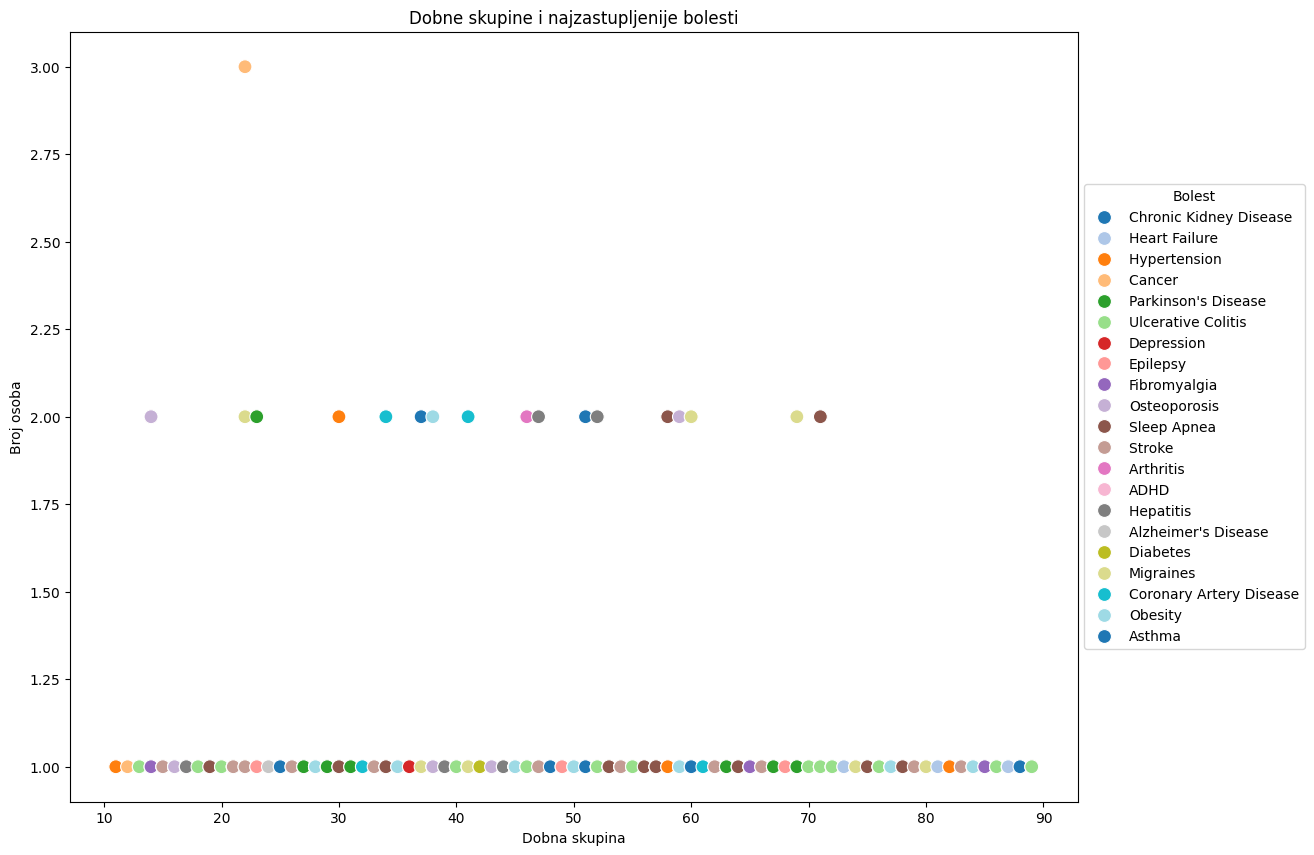

In [12]:
age_disease_counts = combined_data.groupby(['age', 'disease']).size().reset_index(name='counts')
custom_palette = sns.color_palette("tab20", n_colors=len(age_disease_counts['disease'].unique()))

plt.figure(figsize=(13,10))
scatter_plot = sns.scatterplot(data=age_disease_counts, x='age', y='counts', hue='disease', palette=custom_palette, s=100)
plt.xlabel('Dobna skupina')
plt.ylabel('Broj osoba')
plt.title('Dobne skupine i najzastupljenije bolesti')
scatter_plot.legend(title='Bolest', loc='center left', bbox_to_anchor=(1, 0.5)) # pozicioniranje legende izvan "okvira" scatter plota
plt.show()

1. graf: Broj osoba po spolu
- Možemo vidjeti koliko ima muškaraca i žena u skupu podataka (nešto više od 120 muškaraca i nešto manje od 120 žena). Kreiranje stupčastog dijagrama, na x-osi se nalazi spol dok na y-osi se nalazi broj osoba, _ax=axes[0, 0]_ ovo označava da se graf nalazi na koordinatama 0,0 u mreži koju sam prethodno kreirala

2. graf: Broj žena i muškaraca po državama 
- Možemo vidjeti koliko je žena odnoson muškaraca u kojoj državi. Kreiranje stupčastog dijagrama koji grupira podatke po državama i spolu(_groupby_), pomoću funkcije _size_ izračunava broj ponavljanja svake kombinacije i pohranjuje sve u novi DAtaFrame. _hue_ označava boju "stupca" prema spolu, _ax=axes[0, 1]_ ovo označava da se graf nalazi na koordinatama 0,1 u mreži koju sam prethodno kreirala, na x-osi su prikazane države, y-os sadrži broj osoba.

3. graf: Raspodjela krvnih grupa među ispitanicima
-  Možemo vidjeti raspodjelu krvnih grupa među ispitanicima. Najviše zastupljena krvna grupa je 0- (nešto više od 35 osoba), a najmanje AB- (nešto više od 20 osoba). Kreiranje stupčastog grafa koji prikazuje broj ispitanika s određenom krvnom grzupom. Varijabla _blood_type_counts_ sadrži broj pojavljivanja svake krvne grupe.  X- os sarži informacije o krvnoj grupi, a y-os sadrži broj osoba. _ax=axes[1, 0]_ ovo označava da se graf nalazi na koordinatama 1,0 u mreži koju sam prethodno kreirala.

4. graf: Broj osoba s određenom bolešću po spolu
- Možemo vidjeti raspodjelu bolesti po spolu. Najzastupljenija bolest kod žena je bolest koronarnih arterija (12 žena), najmanje zastupljena bolest kod žena je ADHD (2 žene). Najzastupljenija bolest kod muškaraca je apneja u spavanju (10 muškaraca), najmanje zastupljena bolest kod muškaraca je bolest koronarnih arterija (2 muškarca). Nakon toga slijedi kreiranje stupčastog dijagrama, varijabla _disease_gender_counts_ sadrži grupirane podatke po bolesti i spolu(_groupby_), pomoću funkcije _size_ izračunava broj ponavljanja svake kombinacije i pohranjuje sve u novi DAtaFrame. _ax=axes[1, 1]_ ovo označava da se graf nalazi na koordinatama 1,1 u mreži koju sam prethodno kreirala 

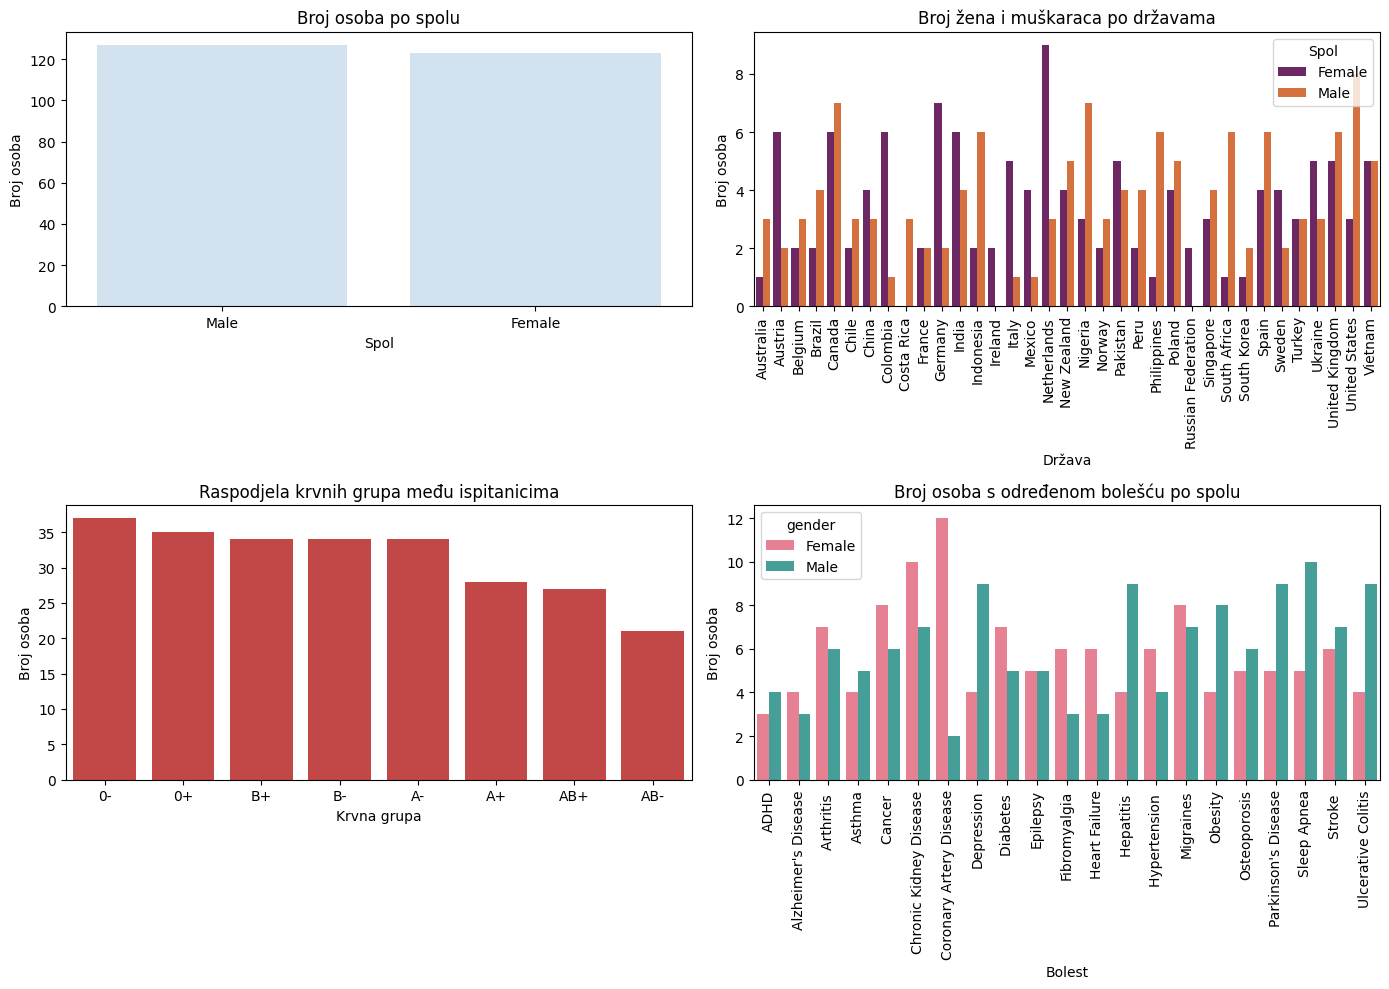

In [13]:
# Prikaz 4 grafa u mreži s dva reda i dva stupca, za izradu grafova korištene su biblioteke matplotlib i seaborn
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. graf: Broj osoba po spolu
sns.barplot(x=combined_data['gender'].value_counts().index, y=combined_data['gender'].value_counts(), ax=axes[0, 0], color='#CFE2F3')
axes[0, 0].set_xlabel('Spol')
axes[0, 0].set_ylabel('Broj osoba')
axes[0, 0].set_title('Broj osoba po spolu')

# 2. graf: Broj žena i muškaraca po državam
gender_counts = combined_data.groupby(['country', 'gender']).size().reset_index(name='counts')
sns.barplot(data=gender_counts, x='country', y='counts', hue='gender', palette='inferno', ax=axes[0, 1])
axes[0, 1].set_xlabel('Država')
axes[0, 1].set_ylabel('Broj osoba')
axes[0, 1].set_title('Broj žena i muškaraca po državama')
axes[0, 1].legend(title='Spol', loc='upper right')
axes[0, 1].tick_params(axis='x', rotation=90)

# 3. graf: Raspodjela krvnih grupa među ispitanicima
blood_type_counts = combined_data['blood_type'].value_counts()
sns.barplot(x=blood_type_counts.index, y=blood_type_counts, color='#d63232', ax=axes[1, 0])
axes[1, 0].set_xlabel('Krvna grupa')
axes[1, 0].set_ylabel('Broj osoba')
axes[1, 0].set_title('Raspodjela krvnih grupa među ispitanicima')
axes[1, 0].tick_params(axis='x', rotation=0)

# 4. graf: Broj osoba s određenom bolešću po spolu
disease_gender_counts = combined_data.groupby(['disease', 'gender']).size().reset_index(name='counts')
sns.barplot(data=disease_gender_counts, x='disease', y='counts', hue='gender', palette='husl', ax=axes[1, 1])
axes[1, 1].set_xlabel('Bolest')
axes[1, 1].set_ylabel('Broj osoba')
axes[1, 1].set_title('Broj osoba s određenom bolešću po spolu')
axes[1, 1].tick_params(axis='x', rotation=90)

# Prikaz grafova
plt.tight_layout()
plt.show()

## Kritički osvrt
Projekt je implementiran pomoću Pandasa i SQLite za obradu i analizu podataka, a za vizualizaciju su korišteni Matplotlib i Seaborn, projekt se oslanja na zdravstvene i demografske podatke iz različitih država. Obrada podataka je ključna za daljnju analizu u projektu, nakon što sam učitala podatke prvo sam provjerila nedostaju li podaci u datasetovima koje sam učitala. Nakon provjere uvidjela sam da nema nedostajućih vrijednosti u datasetovima, provjerila sam tipove podataka te izmijenila imena stupaca koji nisu bili dobro imenovani te sam dodala ID u oba dataseta. Nakon toga sam spojila podatke u novi DataFrame te kreirala bazu podataka i pohranila podatke u nju. Implementirala sam REST API za pristup podacima pomoću biblioteke Flask i Python web frameworka. Analiza podataka započinje statističkom provjerom za godine. Korištenjem grafova prikazala sam glavne dvije preraspodjele podataka, a to su zdravstveni podaci po državama i dobnim skupinama tj. bolesti po državama i dobnim skupinama. U praktičnoj primjerni ovaj projekt mogao bi imati snažan utjecaj na istraživanja o bolestima, no pošto su ovo nasumično izgenerirani poadci nisu toliko relevantni i za stvarnu primjenu podaci bi se svakodnevno trebali ažurirati i nadopunjavati bazu podataka kako bi analiza bila relevantna. Također ukoliko bi se ovaj projekt bazirao na podacima iz cijelog svijeta također bio bi potreban i GDPR. 
## Zaključak
Projekt predstavlja pristup obradi i analizi zdravstvenih podataka, pomoću integracije raznih tehnologija Pandas, SQLite, Matplotlib, Seaborn, te REST API i Flask za izgradnju web sučelja. Sam projekt uspješno kombinira detaljnu statističku analizu s tehnikama obrade podataka i vizualizacijei samim time pruža bolji uvid u demografske i geografske aspekte zdravstvenih informacija. Implementacijom REST API-ja unapređuje ovaj projekt time što omogućuje pristup i manipulaciju podacima kroz web sučelje. 

Izrada ovog projekta dokazala mi je da se kombinacijom različitih tehnologija omogućava stvaranje efikasnog alata za anlizu i prezentaciju zdravstvenog modela podataka.

## Literatura

1. Generate data, preuzeto s https://generatedata.com/
2. Haines City, Healthcare Dataset - EDA (2023), preuzeto s https://www.kaggle.com/code/hainescity/healthcare-dataset-eda 
3. Nepoznati autor, Seaborn Color Palettes and How to Use Them, 18. 8. 2023., preuzeto s https://r02b.github.io/seaborn_palettes/
4. ChatGPT https://chat.openai.com/ 